In [2]:
# 收集昌平沙河二手房收据

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
def Select(table):
    rows=table.find_elements(By.TAG_NAME,'dl')
    page_data=[]
    for row in rows:
        intro=row.find_element(By.CLASS_NAME,'tel_shop')
        data=row.find_element(By.CLASS_NAME,'price_right')
        price=data.find_elements(By.TAG_NAME,'span')
        rows_data=[price[0].text,price[1].text,intro.text]
        page_data.append(rows_data)
    df=pd.DataFrame(page_data)
    return df

#收集原始的有用数据

In [4]:
def SelectNum(table):
    rows=table.find_elements(By.TAG_NAME,'dl')
    page_data=[]
    for row in rows:
        intro=row.find_element(By.CLASS_NAME,'tel_shop')
        data=row.find_element(By.CLASS_NAME,'price_right')
        price=data.find_elements(By.TAG_NAME,'span')
        rows_data=[Text2Num(price[0].text),Text2Num(price[1].text),find_m2(intro.text)]
        page_data.append(rows_data)
    df=pd.DataFrame(page_data)
    return df

# 收集但只保留数据的数值格式

In [5]:
def find_m2(text):
    num=re.search(r'(\d+(\.\d+)?)㎡',text)
    return float(num.group(1))

# 将文本中的房子面积数据提取出来

In [6]:
def Text2Num(text):
    matches=re.findall(r"[\d.]+", text)
    number=''.join(matches)
    return float(number)

# 将文本中的价格数据提取出来

In [7]:
driver=webdriver.Chrome()

url="https://esf.fang.com/house-a012-b02698/"
driver.get(url)
driver.maximize_window()

# 打开网页

In [8]:
string_list=[]
num_data=[]
for i in range(20):
    table=driver.find_element(By.CLASS_NAME,'shop_list')
    df=Select(table)
    num_df=SelectNum(table)
    string_list.append(df)
    num_data.append(num_df)
    
    nextpage=driver.find_element(By.LINK_TEXT,'下一页')
    nextpage.click()
string_list
num_data

# 收集20页的数据

[         0         1       2
 0   4100.0  114637.0  357.65
 1   3600.0  114627.0  314.06
 2   3800.0   66666.0  570.00
 3   2880.0   61407.0  469.00
 4   1300.0   37738.0  344.48
 5   1500.0   40266.0  372.52
 6    390.0   45882.0   85.00
 7   1580.0   59242.0  266.70
 8    528.0   40000.0  132.00
 9    545.0   55050.0   99.00
 10  1100.0   69646.0  157.94
 11  2100.0   88581.0  237.07
 12  2500.0   53242.0  469.55
 13  2300.0   41521.0  553.93
 14  1490.0   56501.0  263.71
 15  1650.0   70591.0  233.74
 16   468.0   55058.0   85.00
 17  2700.0   47268.0  571.20
 18  2300.0   79002.0  291.13
 19  2660.0   47509.0  559.89
 20   450.0   45454.0   99.00
 21  5980.0   79521.0  752.00
 22  3200.0   84822.0  377.26
 23  2300.0   52154.0  441.00
 24  5300.0   68939.0  768.79
 25  5299.0   68926.0  768.79
 26  2300.0   55932.0  411.21
 27  8000.0  107671.0  743.00
 28  2700.0   47459.0  568.91
 29  1350.0   50354.0  268.10
 30   413.0   55066.0   75.00
 31  2800.0   74074.0  378.00
 32  4200.

In [9]:
driver.quit()

In [10]:
df_full=pd.concat(string_list)
df_full.columns=['price(10k yuan)',
'price_m2(yuan)',
'介绍']
df_full

# 合并每页的数据并添加列名

,price(10k yuan),price_m2(yuan),介绍
0,4100万,114637元/㎡,独栋| 卧室：7个 | 357.65㎡ | 南向 |苏丽莉
1,3600万,114627元/㎡,独栋| 卧室：4个 | 314.06㎡ | 南向 |苏丽莉
2,3800万,66666元/㎡,独栋| 卧室：5个 | 570㎡ | 东向 |苏丽莉
3,2880万,61407元/㎡,独栋| 卧室：7个 | 469㎡ | 南向 |沈红玉
4,1300万,37738元/㎡,联排| 卧室：5个 | 344.48㎡ | 南向 |沈红玉
...,...,...,...
55,1450万,57312元/㎡,4室2厅 | 253㎡ | 底层 （共5层） | 南北向 |刘贝
56,140万,41322元/㎡,1室0厅 | 33.88㎡ |高层 （共20层） | 东向 | 2011年建 |张淑娥
57,180万,32142元/㎡,1室1厅 | 56㎡ |中层 （共6层） | 西北向 | 1998年建 |王彩娟
58,268万,30454元/㎡,3室1厅 | 88㎡ |高层 （共18层） | 东西向 | 2010年建 |张淑娥


In [11]:
num_data
num_full=pd.concat(num_data)
num_full.columns=['price(10k yuan)',
'price_m2(yuan)',
'm2']
num_full


,price(10k yuan),price_m2(yuan),m2
0,4100.0,114637.0,357.65
1,3600.0,114627.0,314.06
2,3800.0,66666.0,570.00
3,2880.0,61407.0,469.00
4,1300.0,37738.0,344.48
...,...,...,...
55,1450.0,57312.0,253.00
56,140.0,41322.0,33.88
57,180.0,32142.0,56.00
58,268.0,30454.0,88.00


In [25]:
num_full.to_csv("esf_changping_shahe.csv",index=False)

Text(0, 0.5, 'm2')

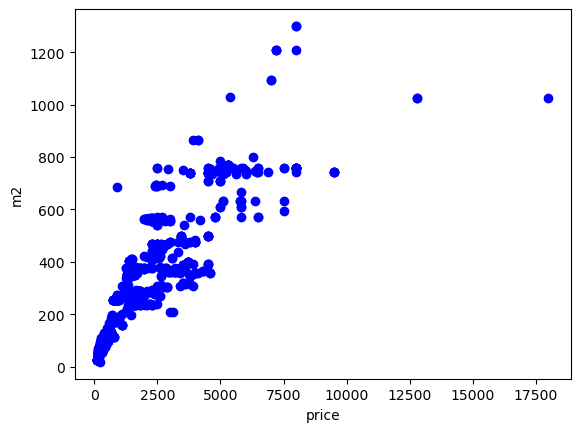

In [12]:
plt.scatter(num_full['price(10k yuan)'], num_full['m2'], color='blue')
plt.xlabel('price')
plt.ylabel('m2')